In [1]:
import pandas as pd

data = pd.read_csv('covid_data2.csv',index_col='date',parse_dates=True)
# data2= data[data['location']== 'New Zealand']

In [2]:
data['total_deaths_per_hundred']= data['total_deaths_per_million']*10000

In [3]:
data.head(60)# data=data.sort_values('date')

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,total_deaths_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,AFG,Asia,Afghanistan,40.0,6.0,1.0,1.0,0.998,0.000006,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-24,AFG,Asia,Afghanistan,42.0,2.0,1.0,0.0,1.047,0.000002,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-25,AFG,Asia,Afghanistan,74.0,32.0,1.0,0.0,1.845,0.000032,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-26,AFG,Asia,Afghanistan,80.0,6.0,2.0,1.0,1.995,0.000006,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-27,AFG,Asia,Afghanistan,91.0,11.0,2.0,0.0,2.269,0.000011,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-28,AFG,Asia,Afghanistan,106.0,15.0,2.0,0.0,2.643,0.000015,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-29,AFG,Asia,Afghanistan,114.0,8.0,4.0,2.0,2.843,0.000008,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-30,AFG,Asia,Afghanistan,114.0,0.0,4.0,0.0,2.843,0.000000,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-31,AFG,Asia,Afghanistan,166.0,52.0,4.0,0.0,4.140,0.000052,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04


In [4]:
 df=data[['iso_code','location','total_deaths_per_hundred']]

In [5]:
# df['country']= (df['location'],inplace=True)



df.rename(columns={ 'location' :'country'}, inplace=True)

C:\Users\Yuga 14\AppData\Local\Temp\ipykernel_18356\3292964113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={ 'location' :'country'}, inplace=True)


In [6]:
df

,iso_code,country,total_deaths_per_hundred
date,,,
2020-03-23,AFG,Afghanistan,0.01
2020-03-24,AFG,Afghanistan,0.01
2020-03-25,AFG,Afghanistan,0.01
2020-03-26,AFG,Afghanistan,0.02
2020-03-27,AFG,Afghanistan,0.02
...,...,...,...
2022-10-23,ZWE,Zimbabwe,56.06
2022-10-24,ZWE,Zimbabwe,56.06
2022-10-25,ZWE,Zimbabwe,56.06


In [7]:
#Create new columns based on distinct values and count them
df = df.sort_values('country')
df['cid'] = (df.groupby(['country']).cumcount()==0).astype(int)
 
df['cid'] = df['cid'].cumsum()

In [8]:
ndf=df.loc[df['cid'] == 139]
sndf = ndf.sort_values('total_deaths_per_hundred')
sndf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-07,NLD,Netherlands,0.01,139
2020-03-06,NLD,Netherlands,0.01,139
2020-03-09,NLD,Netherlands,0.03,139
2020-03-08,NLD,Netherlands,0.03,139
2020-03-10,NLD,Netherlands,0.04,139
...,...,...,...,...
2022-10-21,NLD,Netherlands,228.58,139
2022-10-22,NLD,Netherlands,228.58,139
2022-10-23,NLD,Netherlands,228.58,139


In [9]:
val = sndf['total_deaths_per_hundred'].values

In [10]:
val

array([1.0000e-02, 1.0000e-02, 3.0000e-02, 3.0000e-02, 4.0000e-02,
       5.0000e-02, 5.0000e-02, 1.0000e-01, 1.2000e-01, 2.0000e-01,
       2.4000e-01, 4.3000e-01, 5.8000e-01, 7.6000e-01, 1.0600e+00,
       1.3600e+00, 1.7900e+00, 2.1300e+00, 2.7600e+00, 3.5600e+00,
       4.3400e+00, 5.4600e+00, 6.3900e+00, 7.7100e+00, 8.6400e+00,
       1.0390e+01, 1.1740e+01, 1.3400e+01, 1.4890e+01, 1.6550e+01,
       1.7700e+01, 1.8730e+01, 2.1070e+01, 2.2540e+01, 2.4020e+01,
       2.5190e+01, 2.6520e+01, 2.7460e+01, 2.8320e+01, 2.9540e+01,
       3.1430e+01, 3.3240e+01, 3.4680e+01, 3.6100e+01, 3.6940e+01,
       3.7610e+01, 3.9260e+01, 4.0650e+01, 4.1890e+01, 4.3010e+01,
       4.4210e+01, 4.4880e+01, 4.5310e+01, 4.5790e+01, 4.7240e+01,
       4.8080e+01, 4.9060e+01, 5.0000e+01, 5.0690e+01, 5.0950e+01,
       5.1820e+01, 5.2180e+01, 5.3020e+01, 5.3730e+01, 5.4370e+01,
       5.4550e+01, 5.4710e+01, 5.5250e+01, 5.5770e+01, 5.6050e+01,
       5.6580e+01, 5.6850e+01, 5.6950e+01, 5.7090e+01, 5.7300e

In [11]:
train, test = val[:-60],  val[-60:]

In [12]:
test

array([226.81, 226.81, 226.85, 226.86, 226.87, 226.87, 226.92, 226.92,
       226.92, 226.92, 226.96, 226.96, 226.96, 227.  , 227.  , 227.  ,
       227.  , 227.07, 227.07, 227.07, 227.13, 227.13, 227.13, 227.13,
       227.17, 227.17, 227.17, 227.24, 227.24, 227.24, 227.24, 227.3 ,
       227.3 , 227.3 , 227.37, 227.37, 227.37, 227.37, 227.5 , 227.5 ,
       227.5 , 227.79, 227.79, 227.79, 227.79, 227.89, 227.89, 227.89,
       228.08, 228.08, 228.08, 228.08, 228.35, 228.35, 228.35, 228.58,
       228.58, 228.58, 228.59, 228.73])

In [13]:
test.shape

(60,)

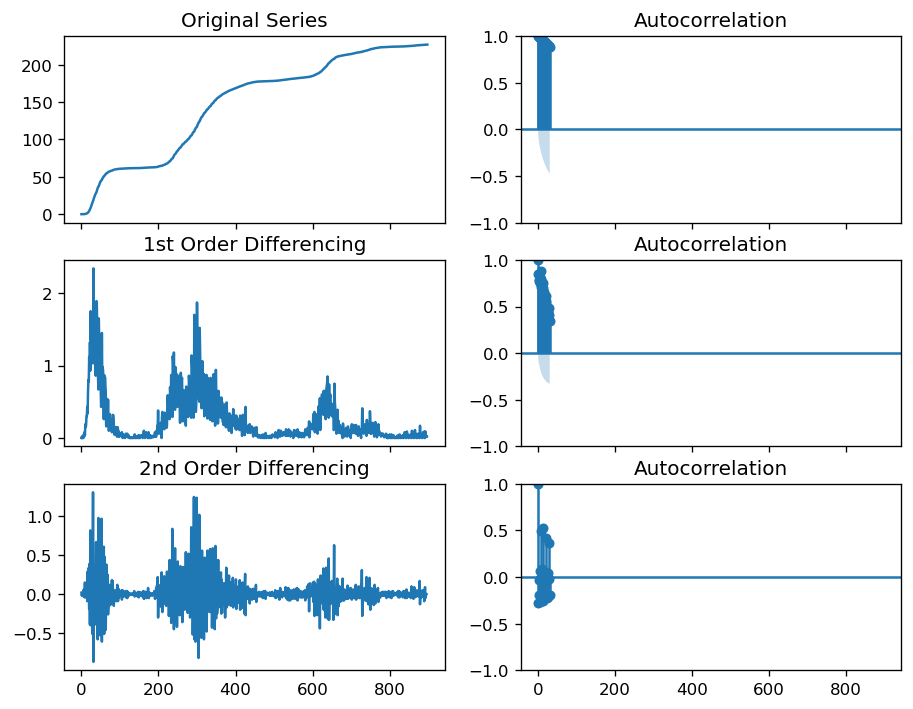

In [14]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train); axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(train)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(train), ax=axes[1, 1])
difftrain = np.diff(train)

# 2nd Differencing
axes[2, 0].plot(np.diff(difftrain)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(difftrain), ax=axes[2, 1])
plt.show()

In [15]:
# !pip install pmdarima

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-677.186, Time=0.92 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-430.965, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-502.357, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-647.448, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-432.965, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-698.789, Time=0.87 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-582.005, Time=0.28 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-704.672, Time=1.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-623.157, Time=0.45 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-700.601, Time=0.96 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-820.077, Time=1.97 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-687.130, Time=0.80 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-871.667, Time=1.79 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-766.430, Time=1.61 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

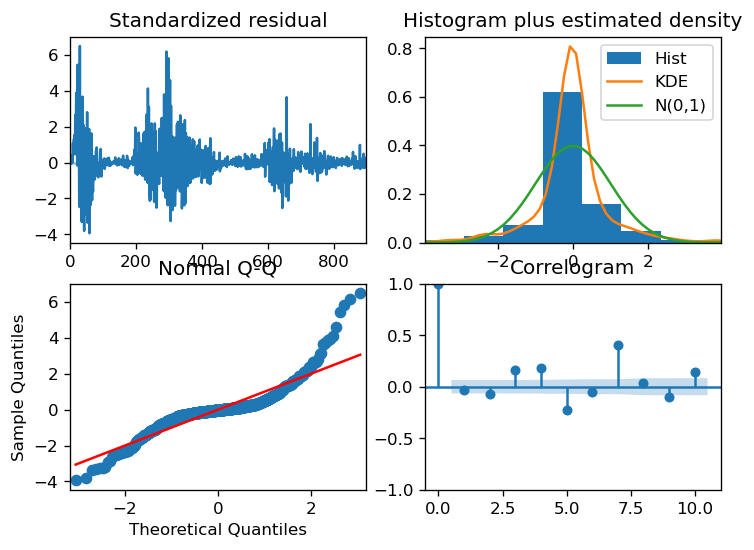

In [17]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

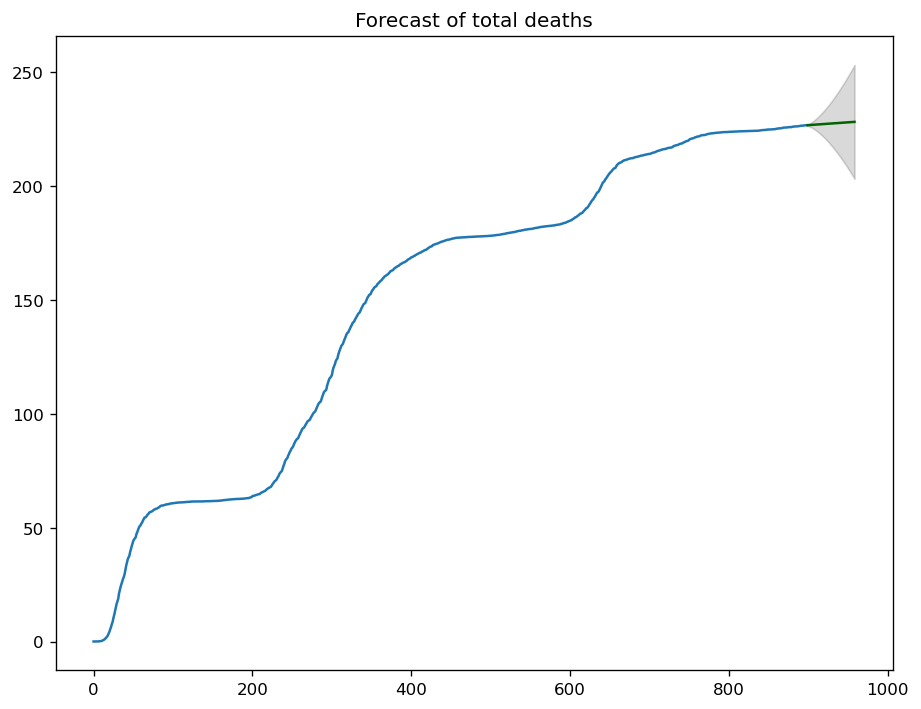

In [18]:
# Forecast
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [19]:
print(fc_series)

899    226.825071
900    226.841657
901    226.864967
902    226.895242
903    226.928075
904    226.957785
905    226.981312
906    226.999995
907    227.018263
908    227.040393
909    227.067685
910    227.097887
911    227.127031
912    227.152234
913    227.173507
914    227.193470
915    227.215361
916    227.240825
917    227.268977
918    227.297232
919    227.323184
920    227.346190
921    227.367625
922    227.389773
923    227.414227
924    227.440894
925    227.468220
926    227.494364
927    227.518447
928    227.541043
929    227.563658
930    227.587640
931    227.613302
932    227.639807
933    227.665843
934    227.690532
935    227.713979
936    227.737100
937    227.760941
938    227.785970
939    227.811819
940    227.837612
941    227.862595
942    227.886623
943    227.910201
944    227.934083
945    227.958748
946    227.984111
947    228.009630
948    228.034711
949    228.059111
950    228.083059
951    228.107064
952    228.131549
953    228.156575
954    228

In [20]:
accuracy=pd.DataFrame({'observed':test, 'predicted':fc_series})

In [21]:
accuracy['diff']= accuracy['predicted']-accuracy['observed'] 

In [22]:
accuracy['country']='Netherlands' 

In [23]:
accuracy

,observed,predicted,diff,country
899,226.81,226.825071,0.015071,Netherlands
900,226.81,226.841657,0.031657,Netherlands
901,226.85,226.864967,0.014967,Netherlands
902,226.86,226.895242,0.035242,Netherlands
903,226.87,226.928075,0.058075,Netherlands
904,226.87,226.957785,0.087785,Netherlands
905,226.92,226.981312,0.061312,Netherlands
906,226.92,226.999995,0.079995,Netherlands
907,226.92,227.018263,0.098263,Netherlands
908,226.92,227.040393,0.120393,Netherlands


In [24]:
fdf=df.loc[df['cid'] == 70]
sfdf = fdf.sort_values('total_deaths_per_hundred')
sfdf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-02-23,FRA,France,0.01,70
2020-02-21,FRA,France,0.01,70
2020-02-20,FRA,France,0.01,70
2020-02-19,FRA,France,0.01,70
2020-02-18,FRA,France,0.01,70
...,...,...,...,...
2022-10-23,FRA,France,1564.06,70
2022-10-24,FRA,France,1565.78,70
2022-10-25,FRA,France,1567.09,70


In [25]:
val2 = sfdf['total_deaths_per_hundred'].values

In [26]:
train1, test1 = val2[:-60],  val2[-60:]

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model1 = pm.auto_arima(train1, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3294.058, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4015.132, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3562.459, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3731.406, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4435.409, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3295.210, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3294.468, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3680.893, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3483.565, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3289.058, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3256.649, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3256.208, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3313.470, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3258.686, Time=0.33 sec

Best model:  ARIMA(3,1,1)(0,0,0)

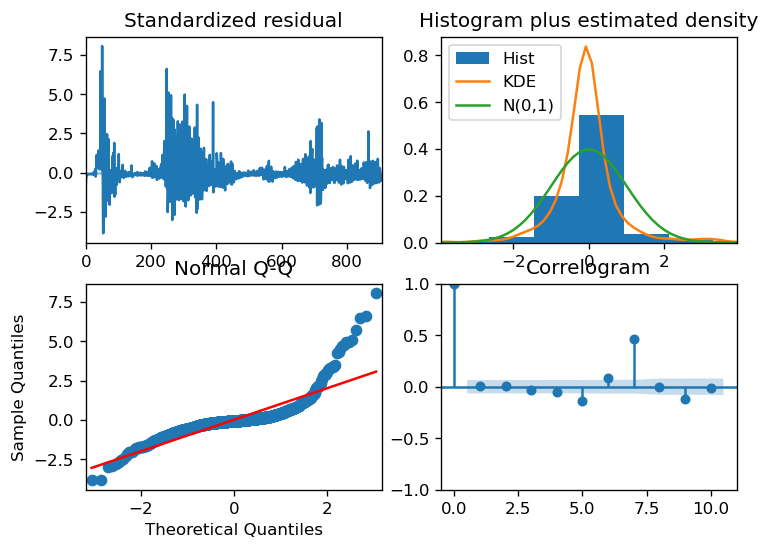

In [28]:
model1.plot_diagnostics(figsize=(7,5))
plt.show()

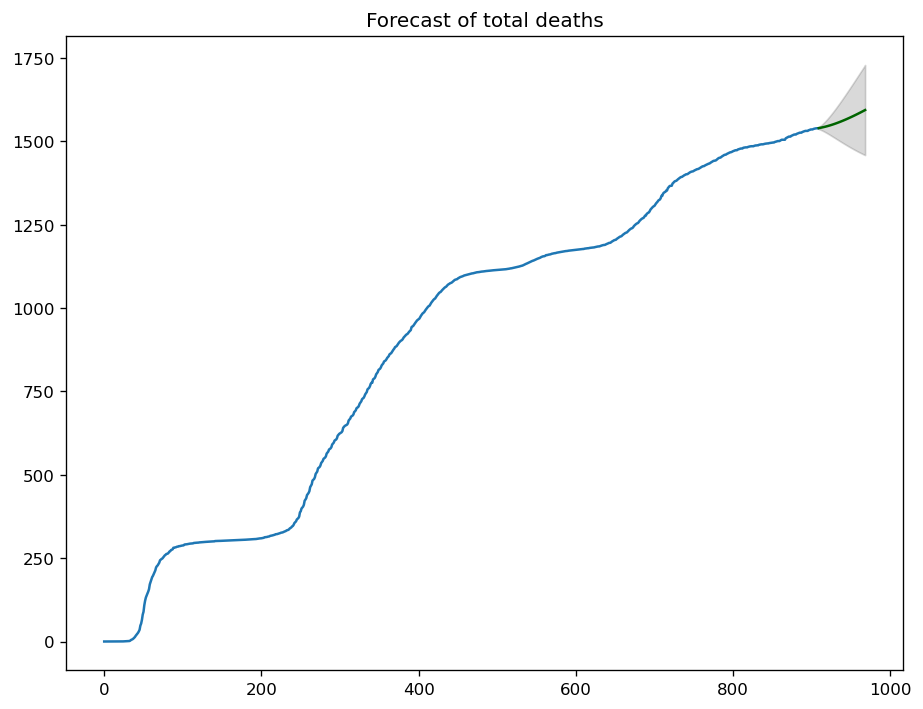

In [29]:
# Forecast
n_periods = 60
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train1), len(train1)+n_periods)

# make series for plotting purpose
fc_series1 = pd.Series(fc, index=index_of_fc)
lower_series1 = pd.Series(confint[:, 0], index=index_of_fc)
upper_series1 = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train1)
plt.plot(fc_series1, color='darkgreen')
plt.fill_between(lower_series1.index,
lower_series1,
upper_series1,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [30]:
print(fc_series1)

909    1539.786832
910    1540.265146
911    1540.651667
912    1541.101794
913    1541.600525
914    1542.109251
915    1542.637415
916    1543.192732
917    1543.770763
918    1544.369521
919    1544.989783
920    1545.631254
921    1546.293115
922    1546.974923
923    1547.676325
924    1548.396869
925    1549.136111
926    1549.893643
927    1550.669066
928    1551.461978
929    1552.271992
930    1553.098729
931    1553.941819
932    1554.800899
933    1555.675615
934    1556.565619
935    1557.470573
936    1558.390145
937    1559.324012
938    1560.271855
939    1561.233367
940    1562.208243
941    1563.196186
942    1564.196909
943    1565.210126
944    1566.235562
945    1567.272944
946    1568.322010
947    1569.382498
948    1570.454156
949    1571.536737
950    1572.629998
951    1573.733702
952    1574.847619
953    1575.971521
954    1577.105187
955    1578.248400
956    1579.400950
957    1580.562628
958    1581.733234
959    1582.912567
960    1584.100436
961    1585.

In [31]:
accuracy2=pd.DataFrame({'observed':test1, 'predicted':fc_series1})

In [32]:
accuracy2['diff']= accuracy2['predicted']-accuracy2['observed'] 

In [33]:
accuracy2['country']='France'

In [34]:
nl_fr= pd.concat([accuracy2,accuracy],ignore_index=True)

In [35]:
nl_fr

,observed,predicted,diff,country
0,1540.36,1539.786832,-0.573168,France
1,1541.08,1540.265146,-0.814854,France
2,1541.62,1540.651667,-0.968333,France
3,1542.03,1541.101794,-0.928206,France
4,1542.58,1541.600525,-0.979475,France
...,...,...,...,...
115,228.58,228.181840,-0.398160,Netherlands
116,228.58,228.206912,-0.373088,Netherlands
117,228.58,228.231528,-0.348472,Netherlands
118,228.59,228.255753,-0.334247,Netherlands


In [36]:
nl_fr.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covid_nl_fr.csv", index=False)